In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv('penguins.csv')

In [40]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [42]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [43]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [44]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [45]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [46]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [47]:
# Handling NaN values

df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [48]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [49]:
# Handling categorical values

categorical = {"island": {"Biscoe": 1, "Dream": 2, "Torgersen": 3},
                "species": {"Adelie": 1, "Gentoo": 2, "Chinstrap": 3},
                "sex": {"MALE": 1, "FEMALE": 2}
               }

df = df.replace(categorical)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,3,39.10000,18.70000,181.000000,3750.000000,1
1,1,3,39.50000,17.40000,186.000000,3800.000000,2
2,1,3,40.30000,18.00000,195.000000,3250.000000,2
3,1,3,43.92193,17.15117,200.915205,4201.754386,1
4,1,3,36.70000,19.30000,193.000000,3450.000000,2


# Scatter plots

## Culmen_length_mm, Culmen_depth_mm

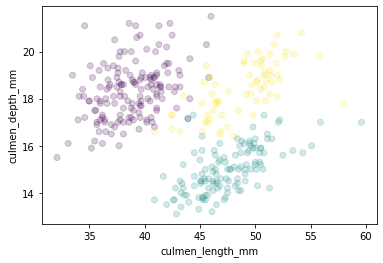

In [50]:
import matplotlib.pyplot as plt

plt.scatter(df['culmen_length_mm'], df['culmen_depth_mm'], alpha=0.2, c=df['species'], cmap='viridis')
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.show()

## Flipper_length_mm, Culmen_depth_mm

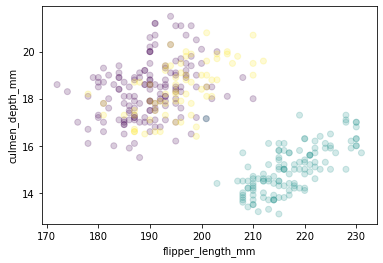

In [51]:
import matplotlib.pyplot as plt

plt.scatter(df['flipper_length_mm'], df['culmen_depth_mm'], alpha=0.2, c=df['species'], cmap='viridis')
plt.xlabel('flipper_length_mm')
plt.ylabel('culmen_depth_mm')
plt.show()

## Body_mass_g, Flipper_length_mm

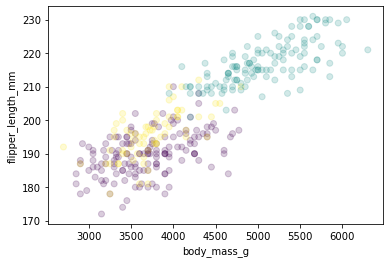

In [52]:
import matplotlib.pyplot as plt

plt.scatter(df['body_mass_g'], df['flipper_length_mm'], alpha=0.2, c=df['species'], cmap='viridis')
plt.xlabel('body_mass_g')
plt.ylabel('flipper_length_mm')
plt.show()

## Flipper_length_mm, Culmen_length_mm

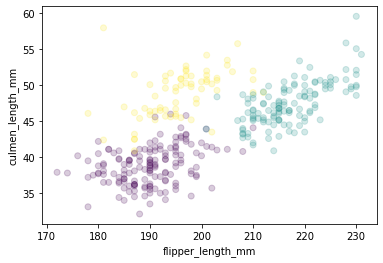

In [53]:
import matplotlib.pyplot as plt

plt.scatter(df['flipper_length_mm'], df['culmen_length_mm'], alpha=0.2, c=df['species'], cmap='viridis')
plt.xlabel('flipper_length_mm')
plt.ylabel('culmen_length_mm')
plt.show()

# Training GMM models

In [54]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, labels, label=True, ax=None):
    ax = ax or plt.gca()
    gmm.fit(X)
    
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

## Culmen_length_mm, Culmen_depth_mm

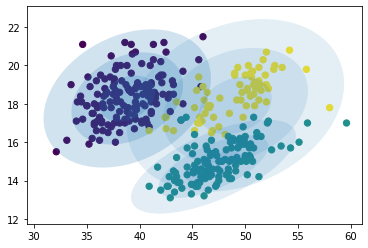

In [56]:
from sklearn import mixture

model = mixture.GaussianMixture(n_components=3)
plot_gmm(model, df[["culmen_length_mm", "culmen_depth_mm"]], df["species"])

## Flipper_length_mm, Culmen_depth_mm

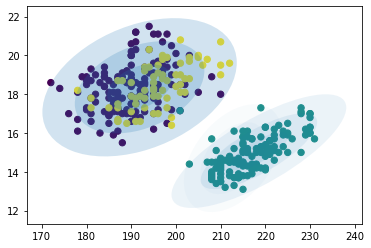

In [57]:
from sklearn import mixture

model = mixture.GaussianMixture(n_components=3)
plot_gmm(model, df[["flipper_length_mm", "culmen_depth_mm"]], df["species"])

## Body_mass_g, Flipper_length_mm

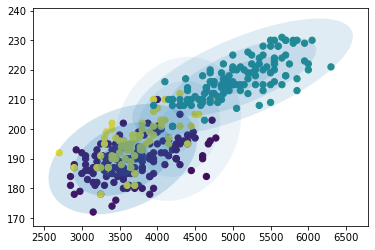

In [58]:
from sklearn import mixture

model = mixture.GaussianMixture(n_components=3)
plot_gmm(model, df[["body_mass_g", "flipper_length_mm"]], df["species"])

## Flipper_length_mm, Culmen_length_mm

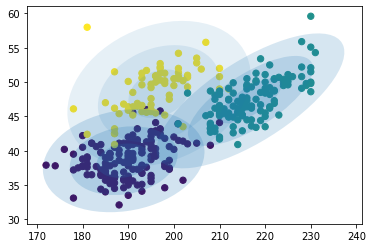

In [59]:
from sklearn import mixture

model = mixture.GaussianMixture(n_components=3)
plot_gmm(model, df[["flipper_length_mm", "culmen_length_mm"]], df["species"])

# Accuracies

In [60]:
def calAndShowAccuracies(predict, actual):
    correct = 0
    all = 0
    for i in range(len(predict)):
        if predict[i] == actual[i]:
            correct += 1
        all += 1
    print(f"Accuracy is: {correct/all}")

## Culmen_length_mm, Culmen_depth_mm

In [118]:
from sklearn import mixture

X = df[["culmen_length_mm", "culmen_depth_mm"]]
y = df["species"]
model = mixture.GaussianMixture(n_components=3)
model.fit(X)
predicts = model.predict(X)
calAndShowAccuracies(predicts+1, df["species"])

Accuracy is: 0.9244186046511628


## Flipper_length_mm, Culmen_depth_mm

In [95]:
from sklearn import mixture

X = df[["flipper_length_mm", "culmen_depth_mm"]]
y = df["species"]
model = mixture.GaussianMixture(n_components=3)
predicts = model.fit(X).predict(X)
calAndShowAccuracies(predicts+1, df["species"])

Accuracy is: 0.7558139534883721


## Body_mass_g, Flipper_length_mm

In [105]:
from sklearn import mixture

X = df[["body_mass_g", "flipper_length_mm"]]
y = df["species"]
model = mixture.GaussianMixture(n_components=3)
predicts = model.fit(X).predict(X)
calAndShowAccuracies(predicts+1, df["species"])

Accuracy is: 0.5755813953488372


## Flipper_length_mm, Culmen_length_mm

In [116]:
from sklearn import mixture

X = df[["flipper_length_mm", "culmen_length_mm"]]
y = df["species"]
model = mixture.GaussianMixture(n_components=3)
predicts = model.fit(X).predict(X)
calAndShowAccuracies(predicts+1, df["species"])

Accuracy is: 0.938953488372093


# AIC/BIC

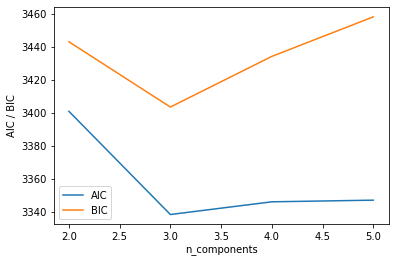

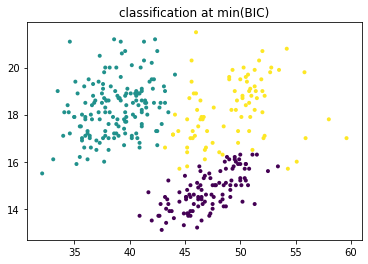

In [119]:
from sklearn import mixture
import pylab as pl
import numpy as np

X = df[["culmen_length_mm", "culmen_depth_mm"]]
y = df["species"]

n_components = np.arange(2, 6)
BIC = np.zeros(n_components.shape)
AIC = np.zeros(n_components.shape)

for i, n in enumerate(n_components):
    clf = mixture.GaussianMixture(n_components=n)
    clf.fit(X)

    AIC[i] = clf.aic(X)
    BIC[i] = clf.bic(X)

pl.figure()
pl.plot(n_components, AIC, label='AIC')
pl.plot(n_components, BIC, label='BIC')
pl.legend(loc=0)
pl.xlabel('n_components')
pl.ylabel('AIC / BIC')

i_n = np.argmin(BIC)

clf = mixture.GaussianMixture(n_components[i_n])
clf.fit(X)
label = clf.predict(X)

pl.figure()
pl.scatter(X.iloc[:, 0], X.iloc[:, 1], c=label, s=16, lw=0)
pl.title('classification at min(BIC)')
pl.show()